In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
raw_data = pd.read_csv('generated_values2years.csv')
df = raw_data.copy()

In [3]:
raw_data.shape

(2000, 6)

In [4]:
df.head()

,fin_record_key,fin_debit_credit_ind,fin_company_id,fin_trans_dt,fin_source_amt,fin_acct_num
0,2693259,c,1936,2024-06-21,179.73,6011231234567890
1,5264506,d,1936,2024-11-25,450.87,6011231234567890
2,1857073,c,1936,2024-09-05,238.07,3782891012345678
3,1609887,c,1936,2024-06-30,210.59,4929173901234567
4,8234346,c,1936,2024-09-10,283.52,6011231234567890


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fin_record_key        2000 non-null   int64  
 1   fin_debit_credit_ind  2000 non-null   object 
 2   fin_company_id        2000 non-null   int64  
 3   fin_trans_dt          2000 non-null   object 
 4   fin_source_amt        2000 non-null   float64
 5   fin_acct_num          2000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 93.9+ KB


In [6]:
df.drop(['fin_debit_credit_ind','fin_record_key','fin_company_id','fin_acct_num'],axis=1,inplace=True)

In [7]:
df['fin_trans_dt'] = pd.to_datetime(df['fin_trans_dt'])
df = df.groupby('fin_trans_dt').agg({'fin_source_amt': 'sum'}).rename(columns={'fin_source_amt': 'Sum_amt'}).reset_index()

In [8]:
df.set_index('fin_trans_dt',inplace=True)

In [9]:
df.head()

,Sum_amt
fin_trans_dt,
2024-01-01,1227.54
2024-01-02,1963.91
2024-01-03,1100.19
2024-01-04,251.85
2024-01-05,1035.83


<Axes: xlabel='fin_trans_dt'>

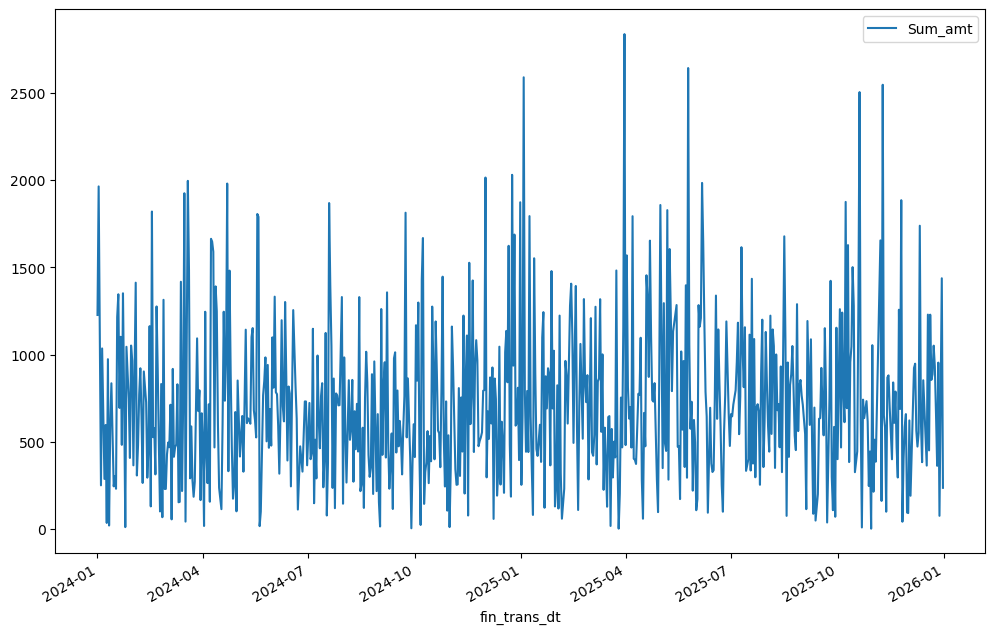

In [10]:
df.plot(figsize = (12,8))

In [11]:
len(df)

692

In [12]:
test_size = 350
test_ind = len(df) - test_size

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train.shape

(342, 1)

In [15]:
test.shape

(350, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)

In [20]:
scaled_test = scaler.transform(test)

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
length = 300
generator = TimeseriesGenerator(scaled_train,scaled_train,length = length , batch_size=1)

In [23]:
X,y = generator[0]

In [24]:
X

array([[[0.60814073],
        [0.97469274],
        [0.54474815],
        [0.12245944],
        [0.51271087],
        [0.3309307 ],
        [0.14061357],
        [0.29441339],
        [0.01519232],
        [0.4820425 ],
        [0.0078799 ],
        [0.29059042],
        [0.41337342],
        [0.11956235],
        [0.14797079],
        [0.1126382 ],
        [0.60192841],
        [0.66715781],
        [0.34314628],
        [0.54593287],
        [0.2378902 ],
        [0.6699653 ],
        [0.36785122],
        [0.00331025],
        [0.51743981],
        [0.43926806],
        [0.36842367],
        [0.20049181],
        [0.52097904],
        [0.47780637],
        [0.17943561],
        [0.7002255 ],
        [0.15049952],
        [0.23652628],
        [0.38184886],
        [0.45616279],
        [0.31935229],
        [0.12920439],
        [0.44712804],
        [0.35905541],
        [0.14423244],
        [0.22357896],
        [0.57628764],
        [0.06239702],
        [0.90308177],
        [0

In [25]:
# y

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense,LSTM 

In [28]:
n_features = 1
model = Sequential()
model.add (LSTM(250, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250)               252000    
                                                                 
 dense (Dense)               (None, 1)                 251       
                                                                 
Total params: 252251 (985.36 KB)
Trainable params: 252251 (985.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
from tensorflow.keras.callbacks import EarlyStopping 

In [31]:
early_stop = EarlyStopping (monitor = 'val_loss',patience = 2)

In [32]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length = length , batch_size=1)

In [33]:
model.fit_generator(generator,epochs=20,
                    validation_data = validation_generator, 
                    callbacks =[early_stop])

Epoch 1/20


D:\Users\sharesh\AppData\Local\Temp\ipykernel_13928\728637226.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,



42/42 [==============================] - 6s 105ms/step - loss: 0.0600 - val_loss: 0.0621
Epoch 2/20
42/42 [==============================] - 4s 87ms/step - loss: 0.0559 - val_loss: 0.0641
Epoch 3/20
42/42 [==============================] - 4s 94ms/step - loss: 0.0529 - val_loss: 0.0602
Epoch 4/20
42/42 [==============================] - 4s 92ms/step - loss: 0.0527 - val_loss: 0.0621
Epoch 5/20
42/42 [==============================] - 4s 92ms/step - loss: 0.0504 - val_loss: 0.0597
Epoch 6/20
42/42 [==============================] - 4s 88ms/step - loss: 0.0476 - val_loss: 0.0588
Epoch 7/20
42/42 [==============================] - 4s 88ms/step - loss: 0.0474 - val_loss: 0.0641
Epoch 8/20
42/42 [==============================] - 4s 87ms/step - loss: 0.0567 - val_loss: 0.0592


In [34]:
losses = pd.DataFrame(model.history.history)

<Axes: >

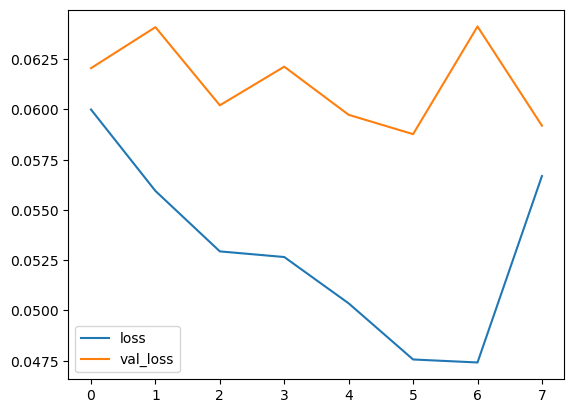

In [35]:
losses.plot()

In [36]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range (len(test)) :
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch =np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


In [37]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

D:\Users\sharesh\AppData\Local\Temp\ipykernel_13928\4268826688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [38]:
test

,Sum_amt,Predictions
fin_trans_dt,,
2024-12-23,187.02,928.314758
2024-12-24,2030.32,897.053661
2024-12-25,937.49,878.750867
2024-12-26,1688.12,864.063514
2024-12-27,593.63,852.666386
...,...,...
2025-12-27,954.61,813.628033
2025-12-28,77.20,813.627913
2025-12-29,790.36,813.627913


<Axes: xlabel='fin_trans_dt'>

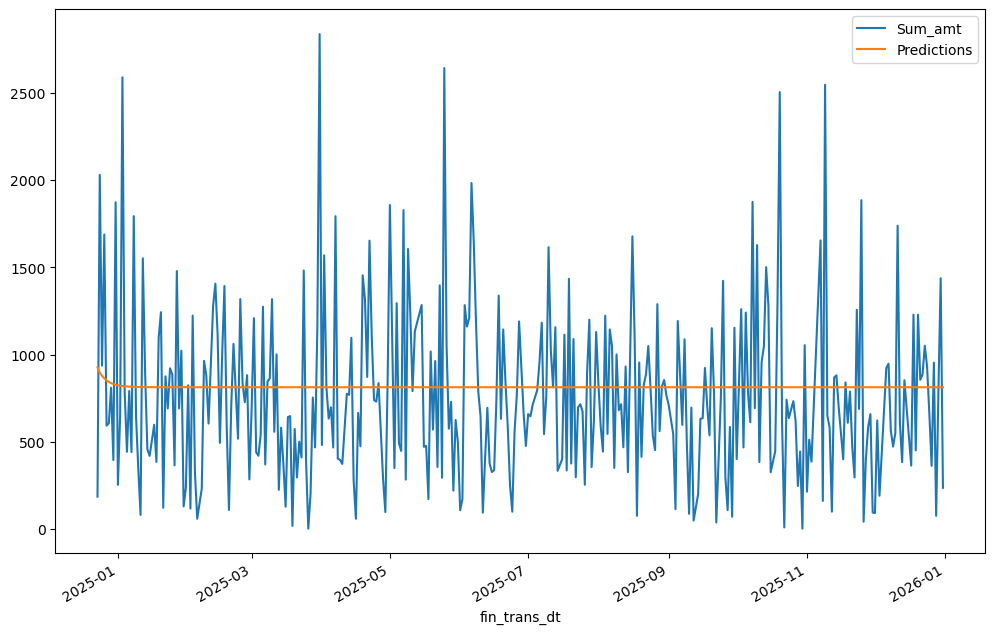

In [39]:
test.plot(figsize = (12,8))

In [40]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [41]:
length = 12 
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length = length , batch_size=1)

In [42]:
n_features = 1
model = Sequential()
model.add (LSTM(250,activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator,epochs=8)

Epoch 1/8


D:\Users\sharesh\AppData\Local\Temp\ipykernel_13928\2481131904.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=8)


680/680 [==============================] - 5s 6ms/step - loss: 0.0291
Epoch 2/8
680/680 [==============================] - 5s 8ms/step - loss: 0.0274
Epoch 3/8
680/680 [==============================] - 5s 8ms/step - loss: 0.0269
Epoch 4/8
680/680 [==============================] - 5s 7ms/step - loss: 0.0273
Epoch 5/8
680/680 [==============================] - 5s 7ms/step - loss: 0.0269
Epoch 6/8
680/680 [==============================] - 5s 7ms/step - loss: 0.0270
Epoch 7/8
680/680 [==============================] - 5s 7ms/step - loss: 0.0267
Epoch 8/8
680/680 [==============================] - 5s 7ms/step - loss: 0.0269


In [43]:
forecast = []
periods = 12 

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range (periods) :
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch =np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

1/1 [==============================] - 0s 16ms/step


In [44]:
forecast = scaler.inverse_transform(forecast)

In [45]:
forecast

array([[529.90514942],
       [520.57917094],
       [516.753107  ],
       [514.04086794],
       [512.56782195],
       [511.48776384],
       [510.81625986],
       [510.53930039],
       [510.09027402],
       [509.69453211],
       [509.55677081],
       [509.1377394 ]])

In [46]:
forecast_index = pd.date_range(start='2025-12-31', periods = periods,freq = "MS")

In [47]:
forecast_df = pd.DataFrame(data = forecast, index= forecast_index, columns = ['Forecast'])

In [48]:
forecast_df

,Forecast
2026-01-01,529.905149
2026-02-01,520.579171
2026-03-01,516.753107
2026-04-01,514.040868
2026-05-01,512.567822
2026-06-01,511.487764
2026-07-01,510.816260
2026-08-01,510.539300
2026-09-01,510.090274
2026-10-01,509.694532


<Axes: xlabel='fin_trans_dt'>

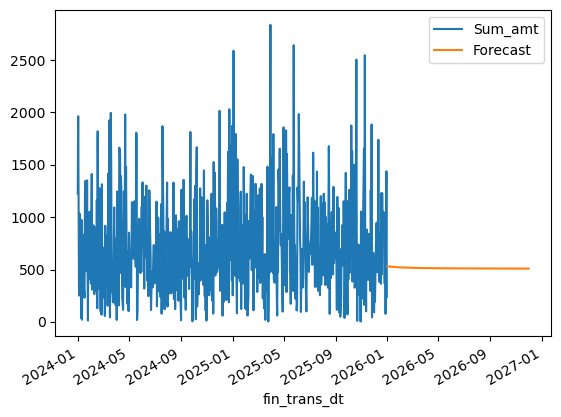

In [49]:
ax = df.plot()
forecast_df.plot(ax=ax)

(20362.0, 20788.0)

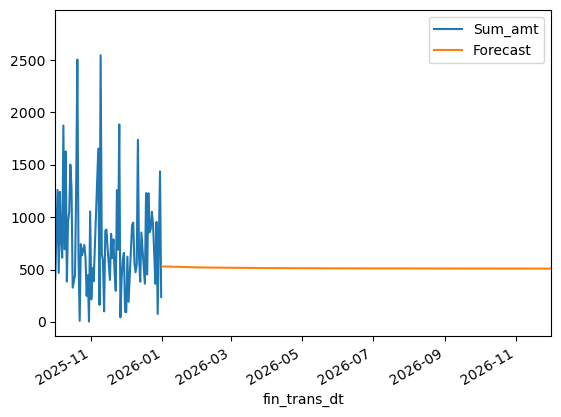

In [50]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2025-10-01','2026-12-01')